# <center> **PYTHON-13. Визуализация данных. Анализ данныx об оттоке клиентов банка**

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## <center> **Задание 9.1**

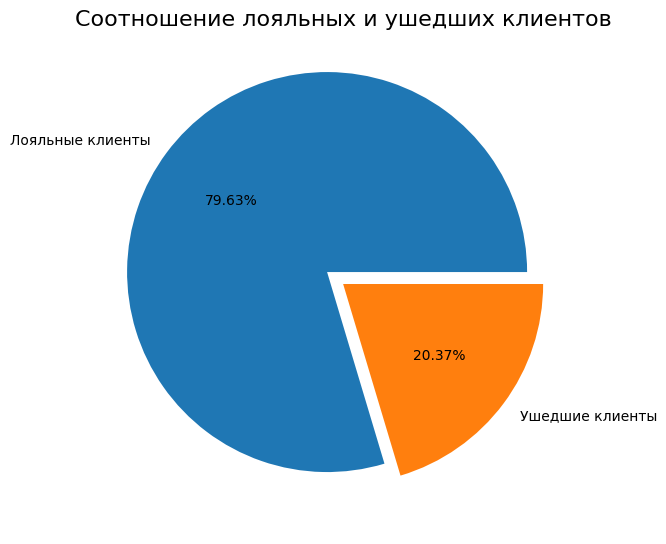

In [78]:
churn_df = churn_data.copy()
churn_df = churn_df.drop(['RowNumber'], axis=1)
df_exited = churn_df.groupby(by='Exited')['CustomerId'].count()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_exited,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.2f%%',
    explode = [0.1, 0]
)
axes.set_title('Соотношение лояльных и ушедших клиентов', fontsize=16);

Из графика видно, что бОльшая часть клиентов (79,63%) является лояльной по отношению к банку.

## <center> **Задание 9.2**

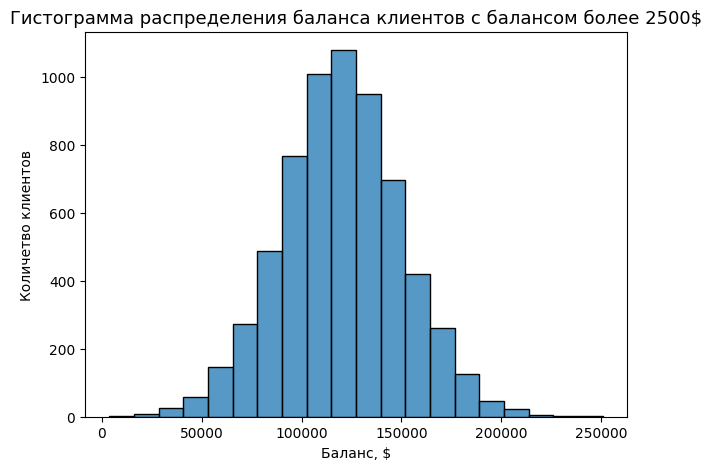

In [79]:
df_balance = churn_df[churn_df['Balance'] > 2500]['Balance']
fig = plt.figure(figsize=(7, 5))
balance_hyst = sns.histplot(
    data=df_balance,
    bins=20,
)
balance_hyst.set_title('Гистограмма распределения баланса клиентов с балансом более 2500$', fontsize=13)
balance_hyst.set_xlabel('Баланс, $')
balance_hyst.set_ylabel('Количетво клиентов');


Гистограмма показывает, что анализируемые данные о балансе клиентов, у которых на счету более 2500 долларов, имеют нормальное распределение. Основная часть таких клиентов хранит на счетах от 100 тыс. до 150 тыс. $.

## <center> **Задание 9.3**

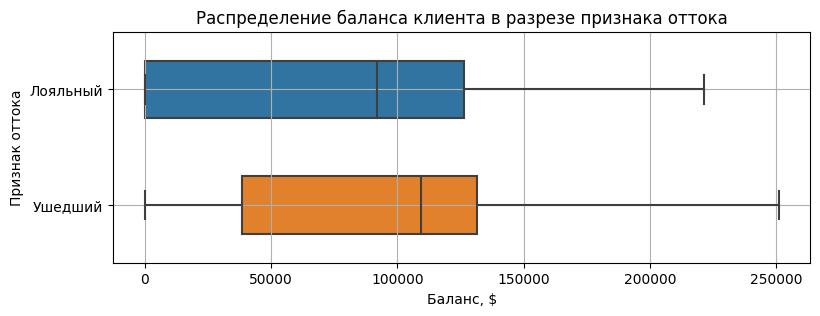

In [80]:
churn_df['Exited'] = churn_df['Exited'].astype('category') 
churn_df['Exited'] = churn_df['Exited'].cat.rename_categories({
    1 : 'Ушедший',
    0 : 'Лояльный'
})
fig = plt.figure(figsize=(9, 3))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс, $');
boxplot.set_ylabel('Признак оттока');
boxplot.grid()

Из диаграммы видно, что медианное значение баланса ушедших клиентов выше, чем у оставшихся. Кроме того, правая граница распределения для ушедших клиентов больше, чем для оставшихся. Это свидетельствует о том, что банк покидают клиенты с более крупными суммами на балансе, вероятно, выбирая более выгодные варианты вложения средств.

## <center> **Задание 9.4**

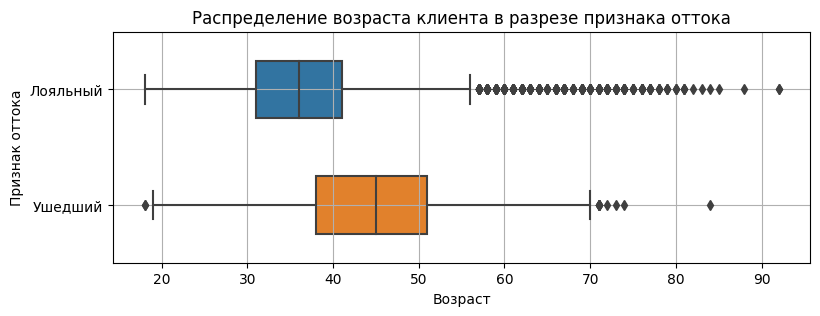

In [81]:
fig = plt.figure(figsize=(9, 3))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение возраста клиента в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Признак оттока');
boxplot.grid()

Медианный возраст ушедших клиентов выше, чем у оставшихся. Банку стоит обратить внимание на возрастную категорию 38-51 год, как наиболее подверженную оттоку. Потренциальных выбросов в категории лояльных клиентов заметно выше.

## <center> **Задание 9.5**

In [82]:
fig = px.scatter(churn_df, 
    x='CreditScore', 
    y='EstimatedSalary',
    color='Exited',
    marginal_x="histogram",
    marginal_y="histogram",
    labels={'CreditScore':'Кредитный рейтинг', 'EstimatedSalary':'Предполагаемая зарплата', 'Exited':'Признак оттока'},
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
    )
fig.show()

Из диаграммы рассеяния и гистограмм можно сделать вывод, что явной взаимосвязи между кредитным рейтингом клиента и его предполагаемой зарплатой нет.

## <center> **Задание 9.6**

In [83]:
df_exited = churn_data.groupby(by='Gender', as_index=False)['Exited'].mean().round(2)
fig = px.bar(
    data_frame=df_exited,
    x="Gender",
    y="Exited",
    color='Gender',
    text = 'Exited',
    orientation='v',
    height=500,
    width=500,
    labels={'Gender':'Пол', 'Exited':'Доля оттока в группе'},
    title='Кто чаще уходит, мужчины или женщины?'
)
fig.show()

Из графика видно, что клиенты-женщины уходят из банка чаще, чем клиенты-мужчины.

## <center> **Задание 9.7**

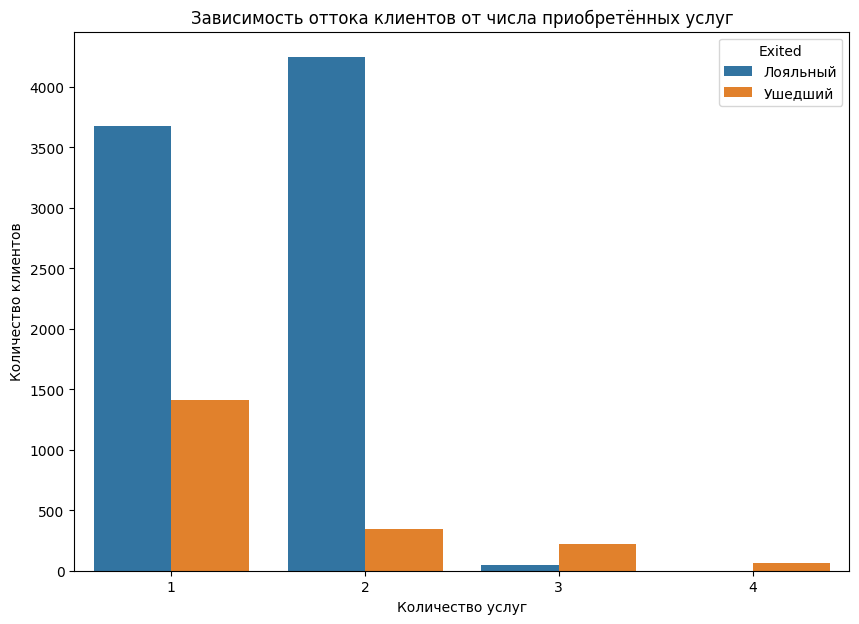

In [84]:

df_exited = churn_df.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=df_exited,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
)
barplot.set_title('Зависимость оттока клиентов от числа приобретённых услуг');
barplot.set_xlabel('Количество услуг');
barplot.set_ylabel('Количество клиентов');

Наиболее лояльными являются клиенты, использующие 2 услуги. Если клиент использует более 2-х услуг, то вероятность его ухода крайне велика.

## <center> **Задание 9.8**

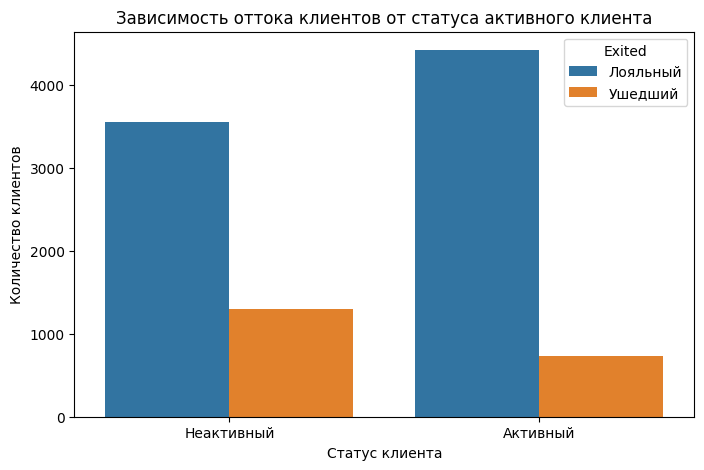

In [85]:
df_exited = churn_df.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()
df_exited['IsActiveMember'] = df_exited['IsActiveMember'].astype('category') 
df_exited['IsActiveMember'] = df_exited['IsActiveMember'].cat.rename_categories({
    1 : 'Активный',
    0 : 'Неактивный'
})
fig = plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=df_exited,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
)
barplot.set_title('Зависимость оттока клиентов от статуса активного клиента');
barplot.set_xlabel('Статус клиента');
barplot.set_ylabel('Количество клиентов');

Активные клиенты менее подвержены оттоку. Для уменьшения оттока неактивных клиентов банку следует разработать программу лояльности и мотивировать таких клиентов на активность.

## <center> **Задание 9.9**

In [86]:
df_exited = churn_data.groupby('Geography', as_index=False)['Exited'].mean()
fig = px.choropleth(
    data_frame=df_exited,
    locations="Geography",
    locationmode="country names",
    color="Exited",
    range_color=[0, 0.5],
    title='Доля ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds',
    labels={'Geography':'Страна', 'Exited':'Доля оттока'},
)
fig.show()

Самая высокая доля оттока клиентов в Германии. Это может быть связано с тем, что конкуренты на рынке банковских услуг предлагают более выгодные условия. Банку следует провести анализ рынка банковских услуг в Германии и пересмотреть условия по предлагаемым продуктам.

## <center> **Задание 9.10**

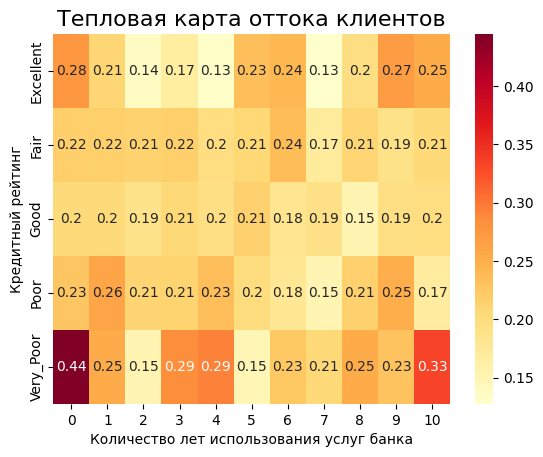

In [87]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_df = churn_data.copy()
churn_df = churn_df.drop(['RowNumber'], axis=1)    
churn_df['CreditScoreCat'] = churn_df.CreditScore.apply(get_credit_score_cat)
pivot = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure', 
    aggfunc='mean'
)
heatmap = sns.heatmap(data=pivot, cmap='YlOrRd', annot=True)
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16);
heatmap.set_xlabel('Количество лет использования услуг банка');
heatmap.set_ylabel('Кредитный рейтинг');

Наибольший отток наблюдается в двух категориях: 
1) Новые клиенты (менее 1 года в банке) с очень плохим кредитным рейтингом;
2) Старые клиенты (10 лет в банке) с очень плохим кредитным рейтингом.

Также стоит обратить внимание на клиентов с очень хорошим кредитным рейтингом (как новых, так и со стажем 9-10 лет), доля оттока в этих категориях довольно велика.